In [ ]:
!pip install ultralytics opencv-python matplotlib -q
from ultralytics import YOLO
import os, zipfile, shutil, glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/vegetation_dataset/vegetation segmentation.v2i.yolov8.zip"
extract_path = "/content/vegetation_dataset"

# Extract dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully to:", extract_path)
!ls {extract_path}


✅ Dataset extracted successfully to: /content/vegetation_dataset
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
yaml_content = """
train: /content/vegetation_dataset/train/images
val: /content/vegetation_dataset/valid/images

nc: 1
names: ['vegetation']
"""

with open("/content/vegetation_dataset/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml created successfully!")
!cat /content/vegetation_dataset/data.yaml

✅ data.yaml created successfully!

train: /content/vegetation_dataset/train/images
val: /content/vegetation_dataset/valid/images

nc: 1
names: ['vegetation']


In [ ]:
# Load YOLOv8 detection model (medium version)
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data="/content/vegetation_dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=4,
    name="vegetation_detection"
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vegetation_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vegetation_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aaf22a5dd60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

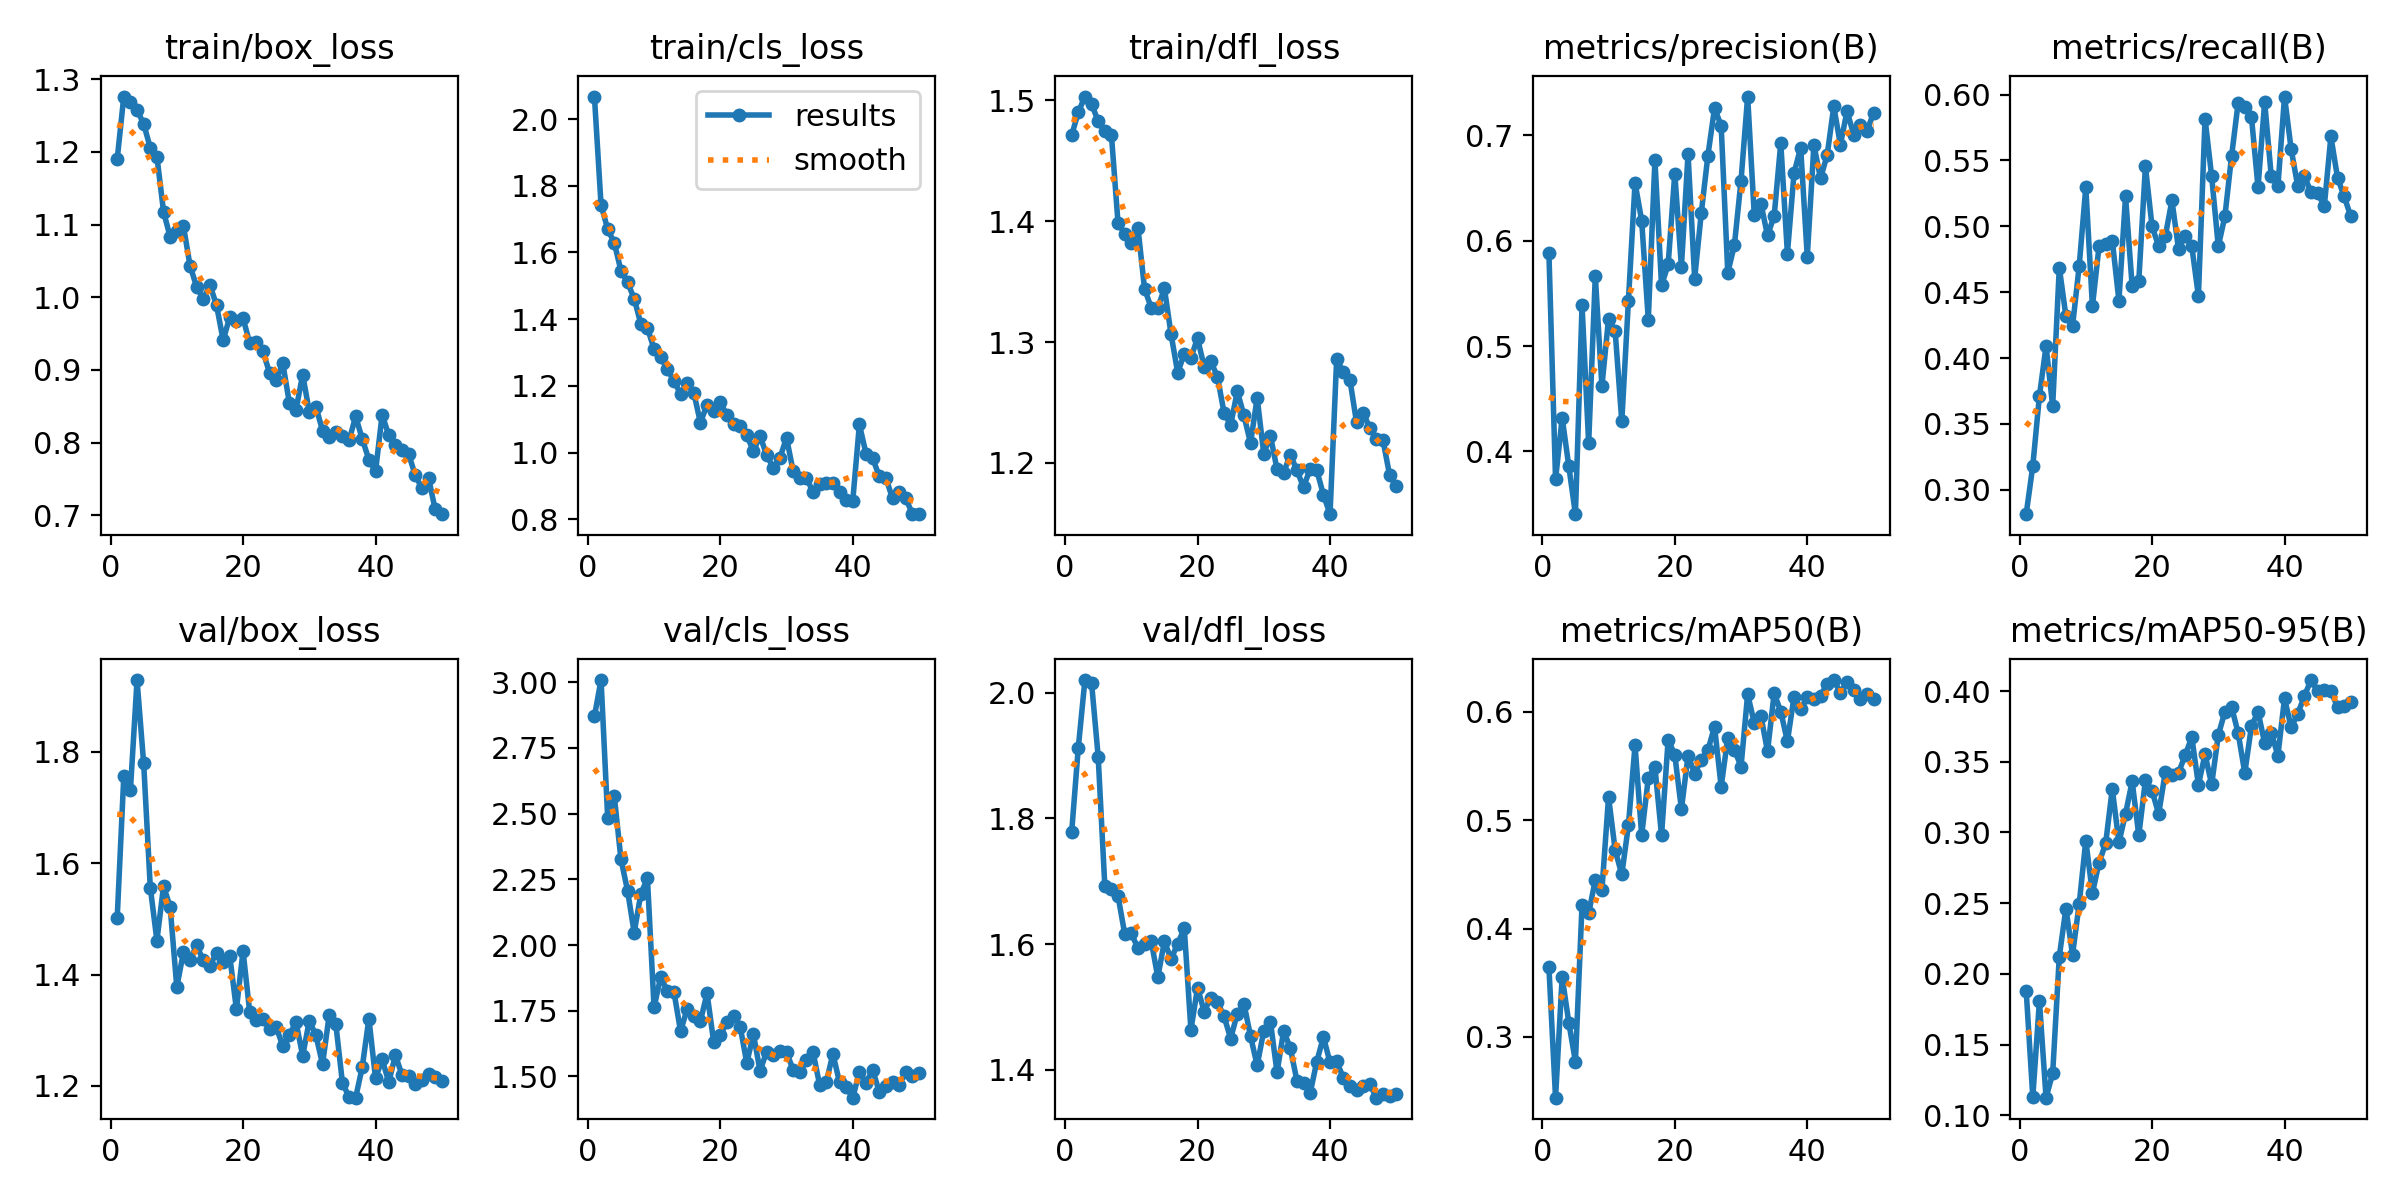

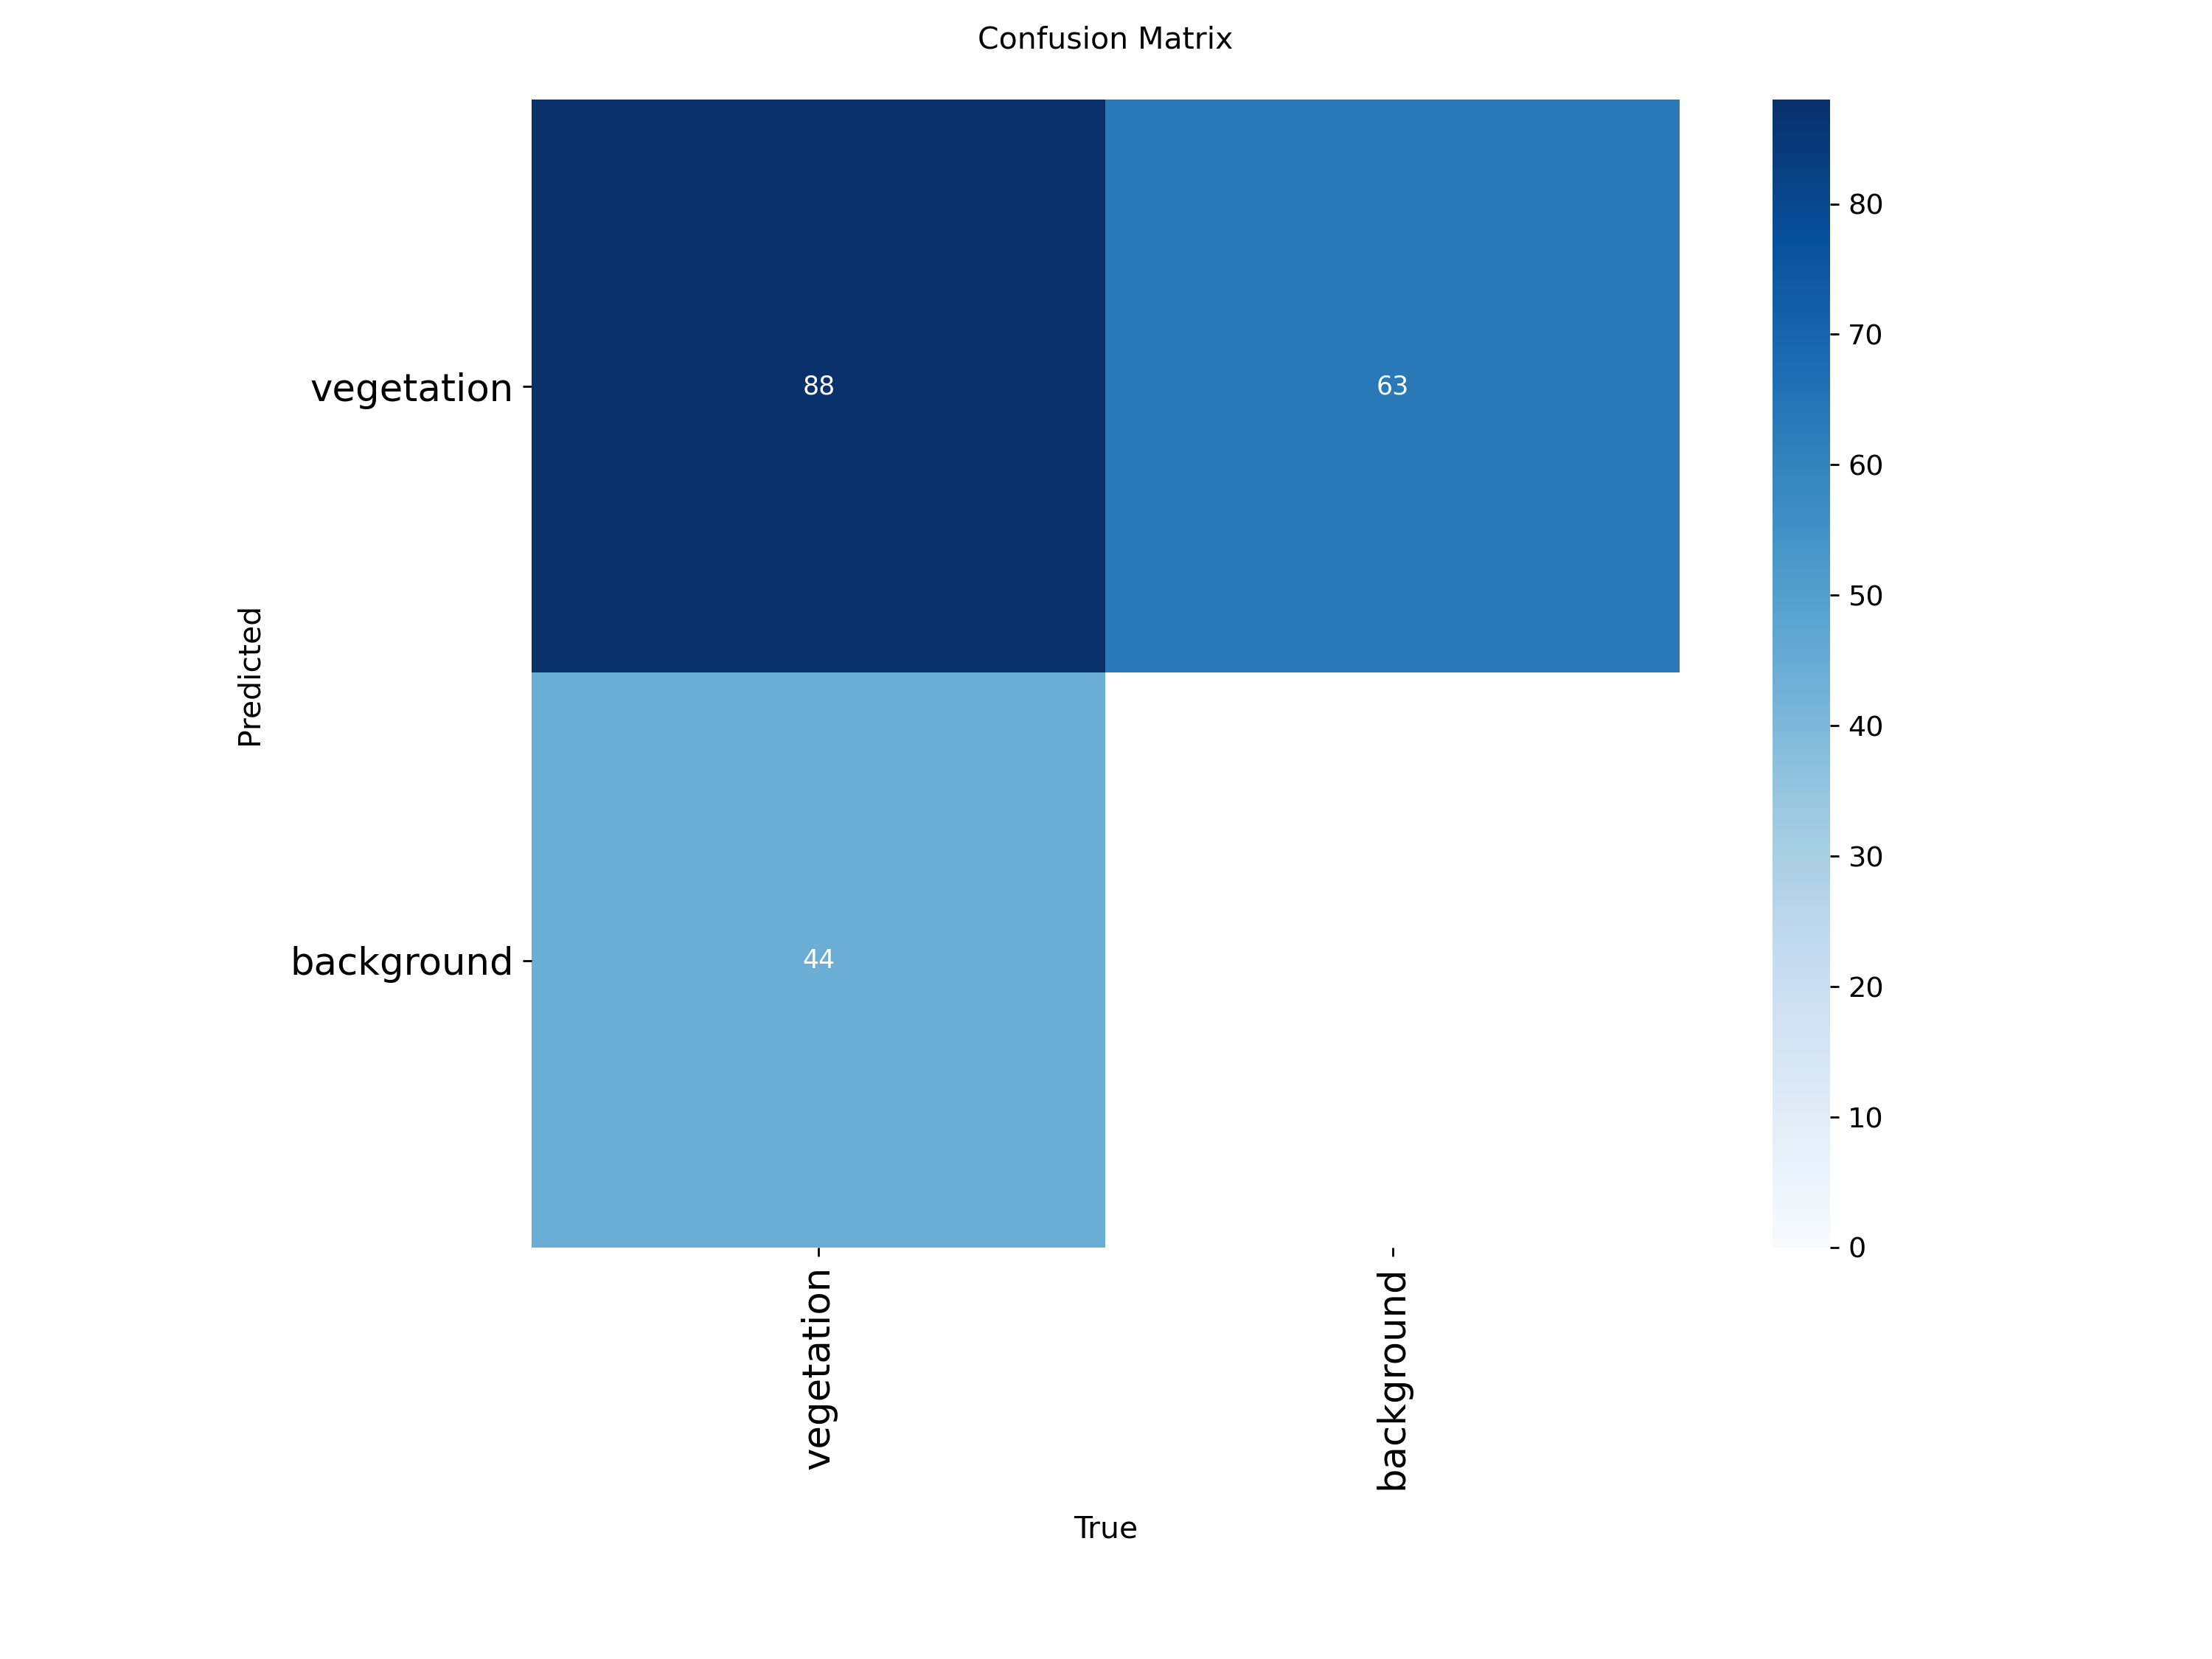

✅ Training graphs and confusion matrix displayed above.


In [ ]:
from IPython.display import Image, display
import os

# Display key result plots
result_dir = "/content/runs/detect/vegetation_detection"

display(Image(filename=os.path.join(result_dir, "results.png")))
display(Image(filename=os.path.join(result_dir, "confusion_matrix.png")))

print("✅ Training graphs and confusion matrix displayed above.")

In [ ]:
!yolo task=detect mode=predict \
  model="/content/runs/detect/vegetation_detection/weights/best.pt" \
  conf=0.25 \
  source="/content/vegetation_dataset/test/images"

In [ ]:
from IPython.display import Image, display
import glob

predicted_images = glob.glob('/content/runs/detect/predict/*.jpg')

for img_path in predicted_images[:5]:
    display(Image(filename=img_path, height=400))

In [ ]:
import shutil, glob

# Save trained model weights
drive_weights_dir = "/content/drive/MyDrive/vegetation_dataset/trained_weights"
os.makedirs(drive_weights_dir, exist_ok=True)
shutil.copy("/content/runs/detect/vegetation_detection/weights/best.pt",
            os.path.join(drive_weights_dir, "best.pt"))

# Save predicted images
drive_pred_dir = "/content/drive/MyDrive/vegetation_dataset/predictions"
os.makedirs(drive_pred_dir, exist_ok=True)

for f in glob.glob('/content/runs/detect/predict/*.jpg'):
    shutil.copy(f, drive_pred_dir)

print("✅ Model and predictions saved permanently to Google Drive!")

In [ ]:
# Export to ONNX (for deployment)
model.export(format="onnx")

In [ ]:
model.export(format="onnx")

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/vegetation_detection/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.72...
ONNX: export success ✅ 7.3s, saved as '/content/runs/detect/vegetation_detection/weights/best.onnx' (11.7 MB)

Export complete (8.1s)
Results saved to /content/runs/detect/vegetation

'/content/runs/detect/vegetation_detection/weights/best.onnx'

In [ ]:
!ls runs/

detect


In [ ]:
!ls runs/detect/

vegetation_detection


In [ ]:
!ls runs/detect/vegetation_detection/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch6840.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch6841.jpg  weights
labels.jpg			 train_batch6842.jpg


In [ ]:
!ls runs/detect/vegetation_detection/weights/

best.onnx  best.pt  last.pt


In [ ]:
# 1️⃣ Create the folder (with -p so it makes the entire path if needed)
!mkdir -p /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models

# 2️⃣ Copy your trained model files into it
!cp runs/detect/vegetation_detection/weights/best.pt /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/
!cp runs/detect/vegetation_detection/weights/best.onnx /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/

In [ ]:
!ls /content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/

best.onnx  best.pt


In [ ]:
from google.colab import files
files.download('/content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/AI_DRIVEN_ARCHAEOLOGICAL_SITE_MAPPING_PLATFORM/models/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>